In [24]:
import io
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image


In [28]:
uploaded = files.upload()


Saving chien.jpeg to chien.jpeg


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
!unzip /content/drive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110.zip


Archive:  /content/drive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110.zip
Written using ZipTricks 5.6.0
 extracting: cats_and_dogs/train/cats/cat_386.jpg  
 extracting: cats_and_dogs/train/cats/cat_15.jpg  
 extracting: cats_and_dogs/train/cats/cat_345.jpg  
 extracting: cats_and_dogs/train/cats/cat_423.jpg  
 extracting: cats_and_dogs/train/cats/cat_351.jpg  
 extracting: cats_and_dogs/train/cats/cat_184.jpg  
 extracting: cats_and_dogs/train/cats/cat_153.jpg  
 extracting: cats_and_dogs/train/cats/cat_580.jpg  
 extracting: cats_and_dogs/train/cats/cat_557.jpg  
 extracting: cats_and_dogs/train/cats/cat_543.jpg  
 extracting: cats_and_dogs/train/cats/cat_225.jpg  
 extracting: cats_and_dogs/train/cats/cat_219.jpg  
 extracting: cats_and_dogs/train/cats/cat_218.jpg  
 extracting: cats_and_dogs/train/cats/cat_224.jpg  
 extracting: cats_and_dogs/train/cats/cat_230.jpg  
 extracting: cats_and_dogs/train/cats/cat_556.jpg  
 extracting: cats_and_dogs/train/cats/cat_581.jpg  
 extracti

In [17]:
data_dir = pathlib.Path('/content/cats_and_dogs/test/cats')
image_count = len(list(data_dir.glob('*')))
print(image_count)

data_dir2 = pathlib.Path('/content/cats_and_dogs/test/dogs')
image_count = len(list(data_dir2.glob('*')))
print(image_count)

data_dir3 = pathlib.Path('/content/cats_and_dogs/train/cats')
image_count = len(list(data_dir3.glob('*')))
print(image_count)

data_dir4 = pathlib.Path('/content/cats_and_dogs/train/dogs')
image_count = len(list(data_dir4.glob('*')))
print(image_count)

70
70
279
278


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/cats_and_dogs/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_generator = test_datagen.flow_from_directory(
    '/content/cats_and_dogs/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 140 images belonging to 2 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# Train the model
history = model.fit(train_generator, epochs=10)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator)

# Print the test accuracy
print('Test accuracy:', test_acc)

Epoch 1/10
18/18 [==============================] - 23s 1s/step - loss: 1.9235 - accuracy: 0.5458
Epoch 2/10
18/18 [==============================] - 21s 1s/step - loss: 0.8303 - accuracy: 0.5583
Epoch 3/10
18/18 [==============================] - 21s 1s/step - loss: 0.6930 - accuracy: 0.6230
Epoch 4/10
18/18 [==============================] - 21s 1s/step - loss: 0.6487 - accuracy: 0.6463
Epoch 5/10
18/18 [==============================] - 22s 1s/step - loss: 0.6265 - accuracy: 0.6894
Epoch 6/10
18/18 [==============================] - 20s 1s/step - loss: 0.6084 - accuracy: 0.6625
Epoch 7/10
18/18 [==============================] - 22s 1s/step - loss: 0.5839 - accuracy: 0.7056
Epoch 8/10
18/18 [==============================] - 22s 1s/step - loss: 0.5835 - accuracy: 0.7056
Epoch 9/10
18/18 [==============================] - 20s 1s/step - loss: 0.5473 - accuracy: 0.7181
Epoch 10/10
5/5 [==============================] - 3s 622ms/step - loss: 0.7394 - accuracy: 0.6214
Test accuracy: 0.62

5/5 [==============================] - 3s 647ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.61      0.55        70
           1       0.51      0.40      0.45        70

    accuracy                           0.51       140
   macro avg       0.51      0.51      0.50       140
weighted avg       0.51      0.51      0.50       140

Confusion Matrix:
 [[43 27]
 [42 28]]
Epoch 1/10
18/18 [==============================] - 28s 1s/step - loss: 0.5435 - accuracy: 0.7397 - val_loss: 0.6930 - val_accuracy: 0.6571
Epoch 2/10
18/18 [==============================] - 28s 1s/step - loss: 0.5183 - accuracy: 0.7415 - val_loss: 0.7036 - val_accuracy: 0.6786
Epoch 3/10
18/18 [==============================] - 26s 1s/step - loss: 0.5305 - accuracy: 0.7666 - val_loss: 0.7363 - val_accuracy: 0.5857
Epoch 4/10
18/18 [==============================] - 27s 2s/step - loss: 0.5072 - accuracy: 0.7397 - val_loss: 0.7527 - val_accuracy: 0.592

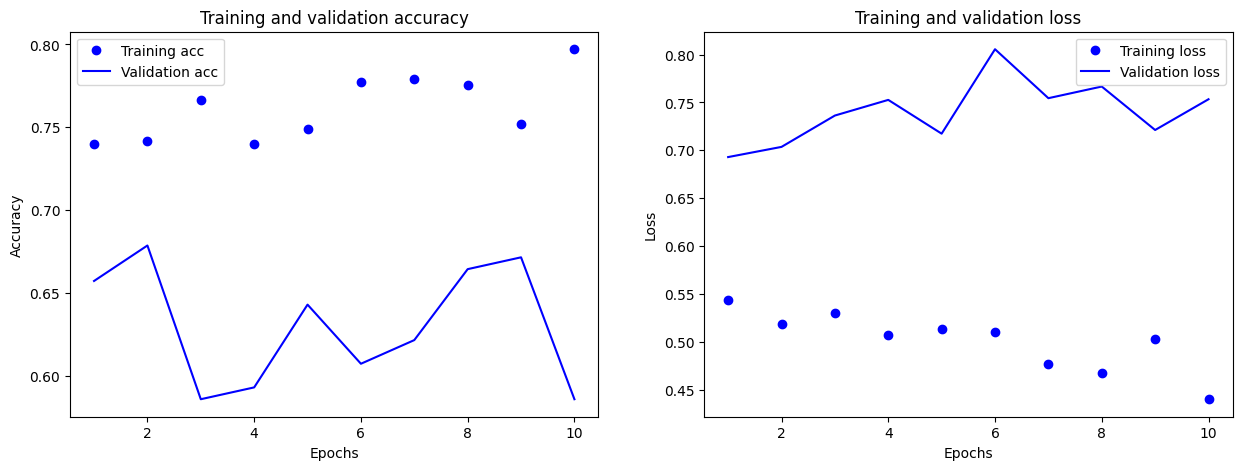

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator)

# Make predictions on the test set
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).flatten()
y_true = validation_generator.classes

# Print classification report and confusion matrix
print('Classification Report:\n', classification_report(y_true, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


# Plot accuracy and loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [29]:
from PIL import Image
import numpy as np

# Load an image and resize it to the input shape of your model
img_path = 'chien.jpeg'
img = Image.open(img_path).resize((150, 150))

# Convert the image to a numpy array and normalize its values
x = np.array(img) / 255.

# Add a batch dimension and make a prediction with your model
x = np.expand_dims(x, axis=0)
y_pred = model.predict(x)

# Print the predicted class
if y_pred[0][0] > 0.5:
    print('dog')
else:
    print('cat')


1/1 [==============================] - 0s 26ms/step
dog
